In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [7]:
with open('datasets/processed/hico/object_list.json') as f:
    object_list = json.load(f)
with open('datasets/processed/hico/hoi_list.json') as f:
    hoi_list = json.load(f)
with open('datasets/processed/hico/hoi_cls_count.json') as f:
    hoi_cls_count = json.load(f)
with open('datasets/processed/hico/anno_list.json') as f:
    anno_list = json.load(f)
with open('datasets/processed/hico/verb_list.json') as f:
    verb_list = json.load(f)
with open('datasets/processed/hico/split_ids.json') as f:
    split_ids = json.load(f)

## Train/Test/Val Splits

([<matplotlib.axis.XTick at 0x18b8cf59be0>,
 [Text(0, 0, 'test'),
  Text(1, 0, 'train'),
  Text(2, 0, 'train_val'),
  Text(3, 0, 'val')])

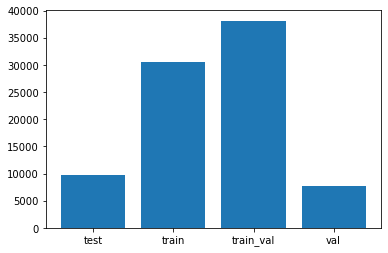

In [12]:
x = np.arange(len(split_ids.keys()))
y = [len(split_ids[key]) for key in split_ids.keys()]
plt.bar(x, height=y)
plt.xticks(x, [key for key in split_ids.keys()])

## Preprocessing

In [28]:
obj_dict, verb_dict, hoi_dict = {}, {}, {}
for item in object_list:
    obj_dict[item['name']] = int(item['id'])
for item in verb_list:
    verb_dict[item['name']] = int(item['id'])
for item in hoi_list:
    hoi_dict[item['id']] = [item['object'], item['verb']]

In [35]:
hoi_per_obj, hoi_per_verb = np.zeros(81), np.zeros(118)
for hoi in hoi_dict.values():
    obj, verb = hoi[0], hoi[1]
    obj_id, verb_id = obj_dict[obj], verb_dict[verb]
    hoi_per_obj[obj_id] += 1
    hoi_per_verb[verb_id] += 1

In [60]:
hoi_freq_obj_train, hoi_freq_obj_test, hoi_freq_obj_val = {}, {}, {}
hoi_freq_verb_train, hoi_freq_verb_test, hoi_freq_verb_val = {}, {}, {}
for hoi in hoi_list:
    hoi_id, obj, verb = hoi['id'], hoi['object'], hoi['verb']
    if obj not in hoi_freq_obj_train:
        hoi_freq_obj_train[obj] = [[0],[hoi_id]]
        hoi_freq_obj_test[obj] = [[0],[hoi_id]]
        hoi_freq_obj_val[obj] = [[0],[hoi_id]]
    else:
        hoi_freq_obj_train[obj][0].append(0)
        hoi_freq_obj_train[obj][1].append(hoi_id)
        hoi_freq_obj_test[obj][0].append(0)
        hoi_freq_obj_test[obj][1].append(hoi_id)
        hoi_freq_obj_val[obj][0].append(0)
        hoi_freq_obj_val[obj][1].append(hoi_id)
    if verb not in hoi_freq_verb_train:
        hoi_freq_verb_train[verb] = [[0],[hoi_id]]
        hoi_freq_verb_test[verb] = [[0],[hoi_id]]
        hoi_freq_verb_val[verb] = [[0],[hoi_id]]
    else:
        hoi_freq_verb_train[verb][0].append(0)
        hoi_freq_verb_train[verb][1].append(hoi_id)
        hoi_freq_verb_test[verb][0].append(0)
        hoi_freq_verb_test[verb][1].append(hoi_id)
        hoi_freq_verb_val[verb][0].append(0)
        hoi_freq_verb_val[verb][1].append(hoi_id)

In [97]:
image_size_train, image_size_test, image_size_val = [], [], []
human_size_train, human_size_test, human_size_val = [], [], []
obj_size_train, obj_size_test, obj_size_val = [], [], []

for anno in anno_list:
    if anno['global_id'] in split_ids['train']:
        img_size = anno['image_size'][0]*anno['image_size'][1]
        image_size_train.append(img_size)
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                size = (human[2]-human[0])*(human[3]-human[1])
                human_size_train.append(size/img_size)
            for obj in hoi['object_bboxes']:
                size = (obj[2]-obj[0])*(obj[3]-obj[1])
                obj_size_train.append(size/img_size)
    elif 'test' in anno['global_id']:
        img_size = anno['image_size'][0]*anno['image_size'][1]
        image_size_test.append(img_size)
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                size = (human[2]-human[0])*(human[3]-human[1])
                human_size_test.append(size/img_size)
            for obj in hoi['object_bboxes']:
                size = (obj[2]-obj[0])*(obj[3]-obj[1])
                obj_size_test.append(size/img_size)
    elif anno['global_id'] in split_ids['val']:
        img_size = anno['image_size'][0]*anno['image_size'][1]
        image_size_val.append(img_size)
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                size = (human[2]-human[0])*(human[3]-human[1])
                human_size_val.append(size/img_size)
            for obj in hoi['object_bboxes']:
                size = (obj[2]-obj[0])*(obj[3]-obj[1])
                obj_size_val.append(size/img_size)
    else:
        pass

In [61]:
verb_list_train, verb_list_test, verb_list_val = np.zeros(118), np.zeros(118), np.zeros(118) # 117 verbs total
obj_list_train, obj_list_test, obj_list_val = np.zeros(81), np.zeros(81), np.zeros(81) # 80 objects total
hoi_list_train, hoi_list_test, hoi_list_val = np.zeros(601), np.zeros(601), np.zeros(601) # 600 hois total
for anno in anno_list:
    if anno['global_id'] in split_ids['train']:
        for hoi in anno['hois']:
            hoi_id = hoi['id']
            obj, verb = hoi_dict[hoi_id]
            obj_list_train[obj_dict[obj]] += 1
            verb_list_train[verb_dict[verb]] += 1
            hoi_list_train[int(hoi_id)] += 1
            hoi_freq_obj_train[obj][0][hoi_freq_obj_train[obj][1].index(hoi_id)] += 1
            hoi_freq_verb_train[verb][0][hoi_freq_verb_train[verb][1].index(hoi_id)] += 1
    elif 'test' in anno['global_id']:
        for hoi in anno['hois']:
            hoi_id = hoi['id']
            obj, verb = hoi_dict[hoi_id]
            obj_list_test[obj_dict[obj]] += 1
            verb_list_test[verb_dict[verb]] += 1
            hoi_list_test[int(hoi_id)] += 1
            hoi_freq_obj_test[obj][0][hoi_freq_obj_test[obj][1].index(hoi_id)] += 1
            hoi_freq_verb_test[verb][0][hoi_freq_verb_test[verb][1].index(hoi_id)] += 1
    elif anno['global_id'] in split_ids['val']:
        for hoi in anno['hois']:
            hoi_id = hoi['id']
            obj, verb = hoi_dict[hoi_id]
            obj_list_val[obj_dict[obj]] += 1
            verb_list_val[verb_dict[verb]] += 1
            hoi_list_val[int(hoi_id)] += 1
            hoi_freq_obj_val[obj][0][hoi_freq_obj_val[obj][1].index(hoi_id)] += 1
            hoi_freq_verb_val[verb][0][hoi_freq_verb_val[verb][1].index(hoi_id)] += 1
    else:
        pass

## Image, Human, Object Histograms

Text(0.5, 1.0, 'Image Size Val')

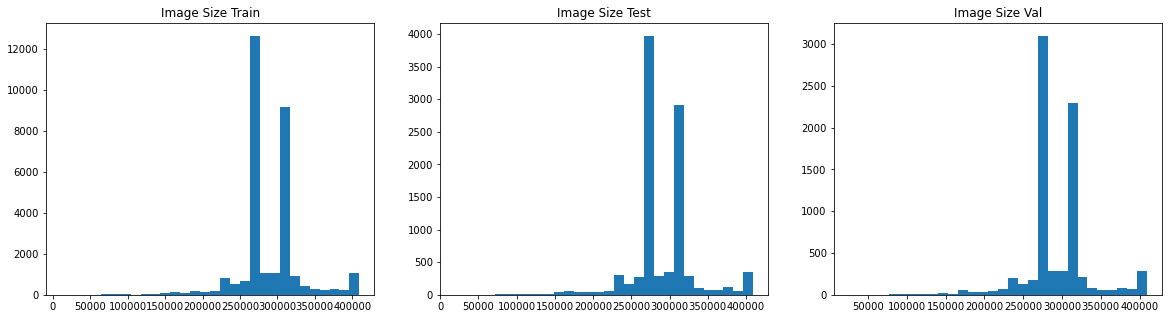

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.hist(image_size_train,bins=30) 
ax1.set_title("Image Size Train")
ax2.hist(image_size_test,bins=30) 
ax2.set_title("Image Size Test")
ax3.hist(image_size_val,bins=30) 
ax3.set_title("Image Size Val")

Text(0.5, 1.0, 'Human Size Val')

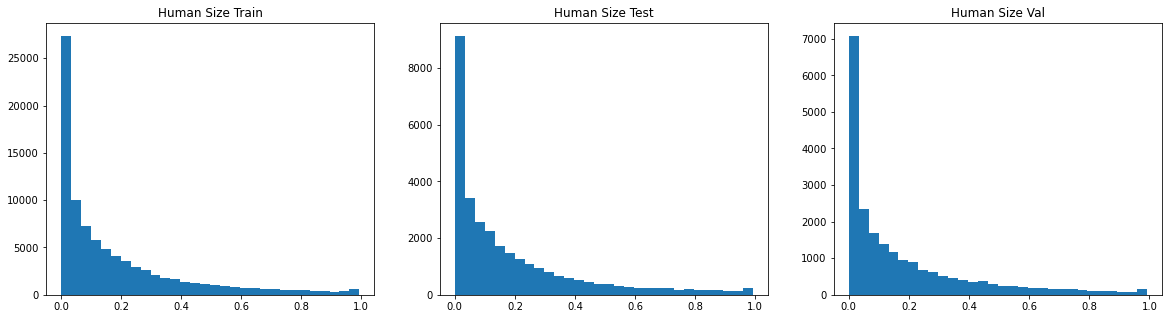

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.hist(human_size_train,bins=30) 
ax1.set_title("Human Size Train")
ax2.hist(human_size_test,bins=30) 
ax2.set_title("Human Size Test")
ax3.hist(human_size_val,bins=30) 
ax3.set_title("Human Size Val")

Text(0.5, 1.0, 'Object Size Val')

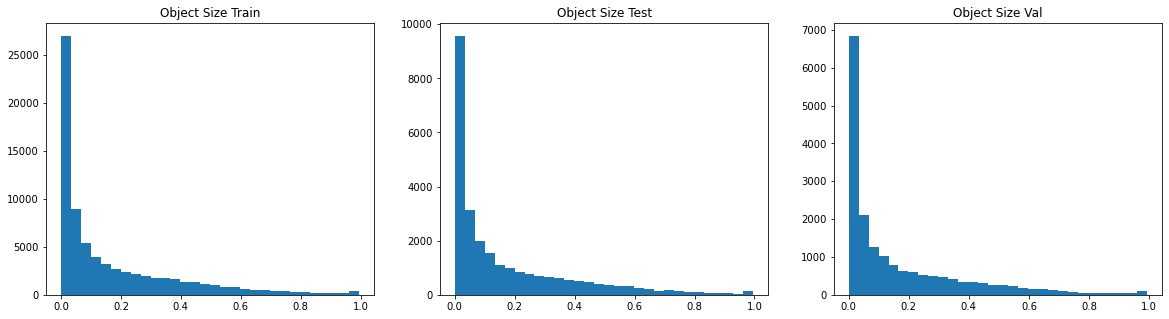

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.hist(obj_size_train,bins=30) 
ax1.set_title("Object Size Train")
ax2.hist(obj_size_test,bins=30) 
ax2.set_title("Object Size Test")
ax3.hist(obj_size_val,bins=30) 
ax3.set_title("Object Size Val")

## Repeats??

In [143]:
testid = split_ids['test']
trainid = split_ids['train']
valid = split_ids['val']

In [144]:
for i in trainid:
    if i in testid or i in valid:
        print(i)

In [162]:
anno_train, anno_test, anno_val = {}, {}, {}
for anno in anno_list:
    if anno['global_id'] in split_ids['train']:
        value = anno['image_size']+anno['pos_hoi_ids']
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                value.extend(human)
            for obj in hoi['object_bboxes']:
                value.extend(obj)
        anno_train[anno['global_id']] = tuple(value)
    elif 'test' in anno['global_id']:
        value = anno['image_size']+anno['pos_hoi_ids']
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                value.extend(human)
            for obj in hoi['object_bboxes']:
                value.extend(obj)
        anno_test[tuple(value)] = anno['global_id']
    elif anno['global_id'] in split_ids['val']:
        value = anno['image_size']+anno['pos_hoi_ids']
        for hoi in anno['hois']:
            for human in hoi['human_bboxes']:
                value.extend(human)
            for obj in hoi['object_bboxes']:
                value.extend(obj)
        anno_val[tuple(value)] = anno['global_id']
    else:
        pass

In [185]:
count = 0
for global_id, item in anno_train.items():
    if item in anno_test:
        count += 1
        print("In anno_test: ", global_id, anno_test[item], len(item))
    if item in anno_val:
        count += 1
        print("In anno_val: ", global_id, anno_val[item], len(item))
    if item in anno_test and item in anno_val:
        count -= 1
print("Count: ", count)

In anno_val:  HICO_train2015_00000398 HICO_train2015_00001277 4
In anno_val:  HICO_train2015_00000823 HICO_train2015_00031496 4
In anno_test:  HICO_train2015_00001306 HICO_test2015_00001819 4
In anno_test:  HICO_train2015_00001421 HICO_test2015_00001819 4
In anno_val:  HICO_train2015_00001510 HICO_train2015_00020396 4
In anno_test:  HICO_train2015_00001547 HICO_test2015_00009364 4
In anno_val:  HICO_train2015_00001547 HICO_train2015_00037174 4
In anno_test:  HICO_train2015_00002759 HICO_test2015_00007925 4
In anno_val:  HICO_train2015_00002759 HICO_train2015_00035067 4
In anno_val:  HICO_train2015_00002920 HICO_train2015_00020396 4
In anno_test:  HICO_train2015_00003359 HICO_test2015_00002228 4
In anno_test:  HICO_train2015_00003752 HICO_test2015_00007925 4
In anno_val:  HICO_train2015_00003752 HICO_train2015_00035067 4
In anno_val:  HICO_train2015_00004133 HICO_train2015_00031044 4
In anno_val:  HICO_train2015_00004503 HICO_train2015_00031496 4
In anno_val:  HICO_train2015_00004700 HI

### Conclusion: No repeats, but there are 79 training images with no human/object bboxes that need to be ignored in training loop.

## HOI's Per Object and Verb

Text(0.5, 1.0, 'HOIs Per Verb')

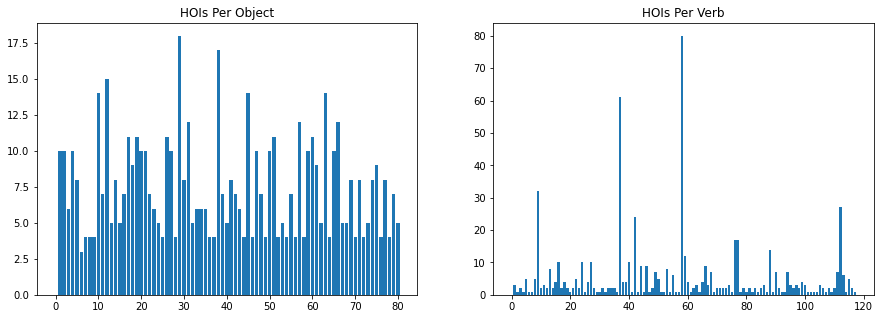

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
x1= np.arange(len(hoi_per_obj))
ax1.bar(x1, height=hoi_per_obj)
ax1.set_title("HOIs Per Object")
x2= np.arange(len(hoi_per_verb))
ax2.bar(x2, height=hoi_per_verb)
ax2.set_title("HOIs Per Verb")

### Percentage Composition

In [132]:
top = 10
top_obj, top_verb = np.sort(hoi_per_obj)[-top:], np.sort(hoi_per_verb)[-top:]
print("Percentage of HOI's (600) that come from top ",top," objects: ", sum(top_obj) / sum(hoi_per_obj))
print("Percentage of HOI's (600) that come from top ",top," verbs: ", sum(top_verb) / sum(hoi_per_verb))

Percentage of HOI's (600) that come from top  10  objects:  0.23166666666666666
Percentage of HOI's (600) that come from top  10  verbs:  0.49


## Verb Bar Graph in Train/Test/Val

Text(0.5, 1.0, 'Occurrences of Each Verb in Validation Set')

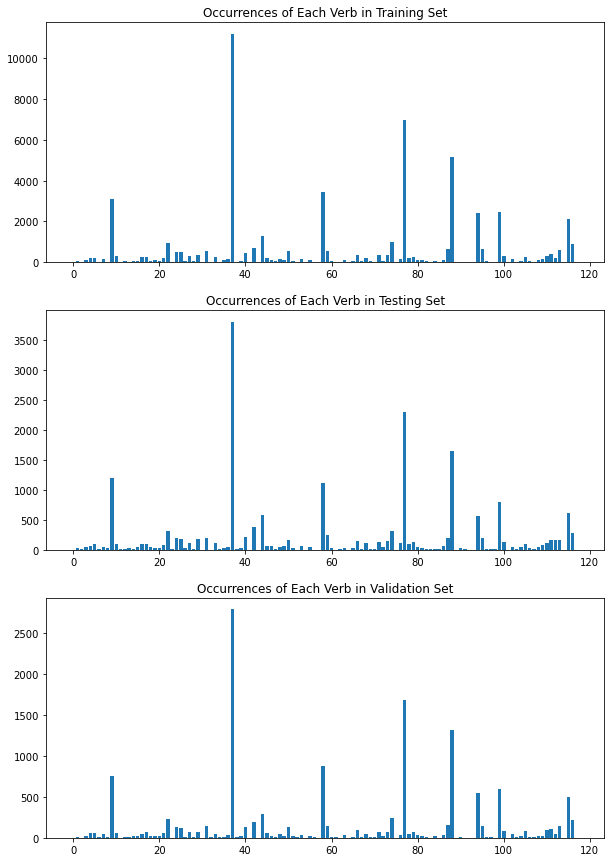

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,15))
x1= np.arange(len(verb_list_train))
ax1.bar(x1, height=verb_list_train)
ax1.set_title("Occurrences of Each Verb in Training Set")
x2= np.arange(len(verb_list_test))
ax2.bar(x2, height=verb_list_test)
ax2.set_title("Occurrences of Each Verb in Testing Set")
x3= np.arange(len(verb_list_val))
ax3.bar(x3, height=verb_list_val)
ax3.set_title("Occurrences of Each Verb in Validation Set")

### Percentage Composition

In [133]:
top = 8
top_train, top_test, top_val = np.sort(verb_list_train)[-top:], np.sort(verb_list_test)[-top:], np.sort(verb_list_val)[-top:]
print("Percentage of training verbs that come from top ",top," labels: ", sum(top_train) / sum(verb_list_train))
print("Percentage of testing verbs that come from top ",top," labels: ", sum(top_test) / sum(verb_list_test))
print("Percentage of validation verbs that come from top ",top," labels: ", sum(top_val) / sum(verb_list_val))

Percentage of training verbs that come from top  8  labels:  0.6539748287398439
Percentage of testing verbs that come from top  8  labels:  0.5958160647325834
Percentage of validation verbs that come from top  8  labels:  0.6538904899135447


## Object Bar Graph in Train/Test/Val

Text(0.5, 1.0, 'Occurrences of Each Object in Validation Set')

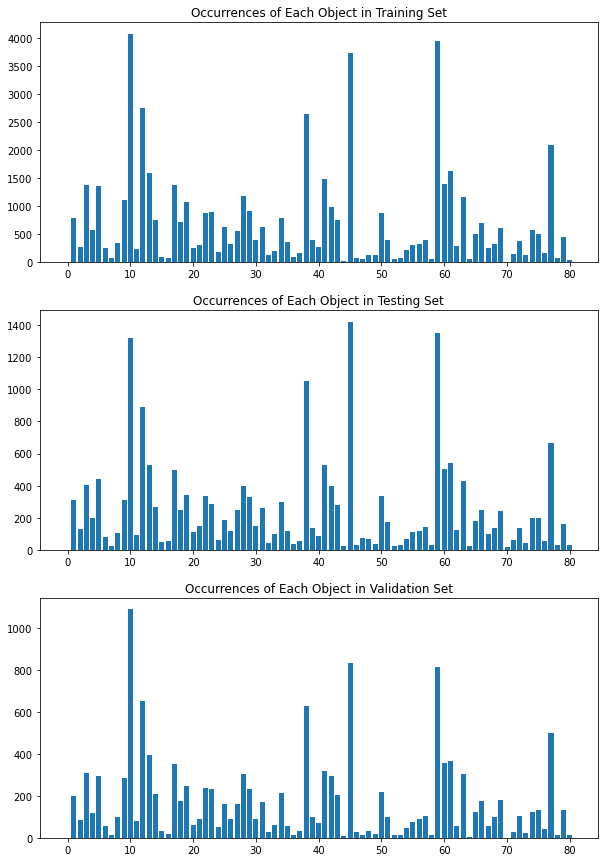

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,15))
x1= np.arange(len(obj_list_train))
ax1.bar(x1, height=obj_list_train)
ax1.set_title("Occurrences of Each Object in Training Set")
x2= np.arange(len(obj_list_test))
ax2.bar(x2, height=obj_list_test)
ax2.set_title("Occurrences of Each Object in Testing Set")
x3= np.arange(len(obj_list_val))
ax3.bar(x3, height=obj_list_val)
ax3.set_title("Occurrences of Each Object in Validation Set")

### Percentage Composition

In [135]:
top = 10
top_train, top_test, top_val = np.sort(obj_list_train)[-top:], np.sort(obj_list_test)[-top:], np.sort(obj_list_val)[-top:]
print("Percentage of training objects that come from top ",top," labels: ", sum(top_train) / sum(obj_list_train))
print("Percentage of testing objects that come from top ",top," labels: ", sum(top_test) / sum(obj_list_test))
print("Percentage of validation objects that come from top ",top," labels: ", sum(top_val) / sum(obj_list_val))

Percentage of training objects that come from top  10  labels:  0.448391836156692
Percentage of testing objects that come from top  10  labels:  0.4345766725873298
Percentage of validation objects that come from top  10  labels:  0.4315561959654179


## HOI Bar Graph in Train/Test/Val

Text(0.5, 1.0, 'Occurrences of Each HOI in Validation Set')

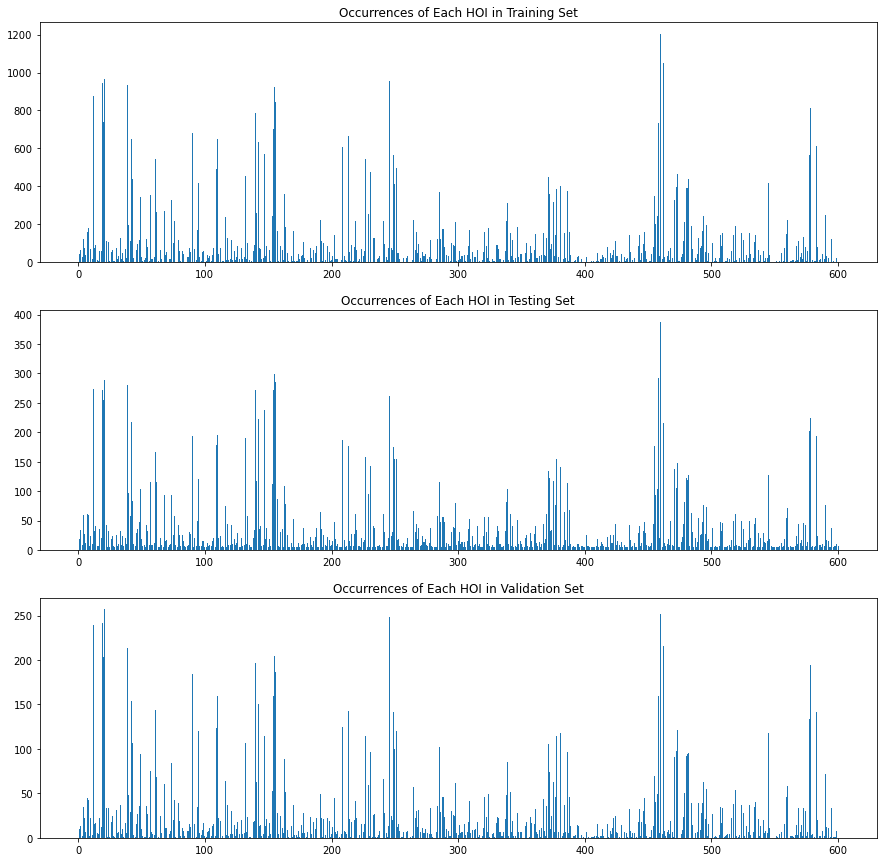

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))
x1= np.arange(len(hoi_list_train))
ax1.bar(x1, height=hoi_list_train)
ax1.set_title("Occurrences of Each HOI in Training Set")
x2= np.arange(len(hoi_list_test))
ax2.bar(x2, height=hoi_list_test)
ax2.set_title("Occurrences of Each HOI in Testing Set")
x3= np.arange(len(hoi_list_val))
ax3.bar(x3, height=hoi_list_val)
ax3.set_title("Occurrences of Each HOI in Validation Set")

### Percentage Composition

In [130]:
top = 50
top_train, top_test, top_val = np.sort(hoi_list_train)[-top:], np.sort(hoi_list_test)[-top:], np.sort(hoi_list_val)[-top:]
print("Percentage of training HOI's that come from top ",top," labels: ", sum(top_train) / sum(hoi_list_train))
print("Percentage of testing HOI's that come from top ",top," labels: ", sum(top_test) / sum(hoi_list_test))
print("Percentage of validation HOI's that come from top ",top," labels: ", sum(top_val) / sum(hoi_list_val))

Percentage of training HOI's that come from top  50  labels:  0.5225426158993149
Percentage of testing HOI's that come from top  50  labels:  0.46679494770080915
Percentage of validation HOI's that come from top  50  labels:  0.5134726224783862


## Distributions of HOIs Per Object

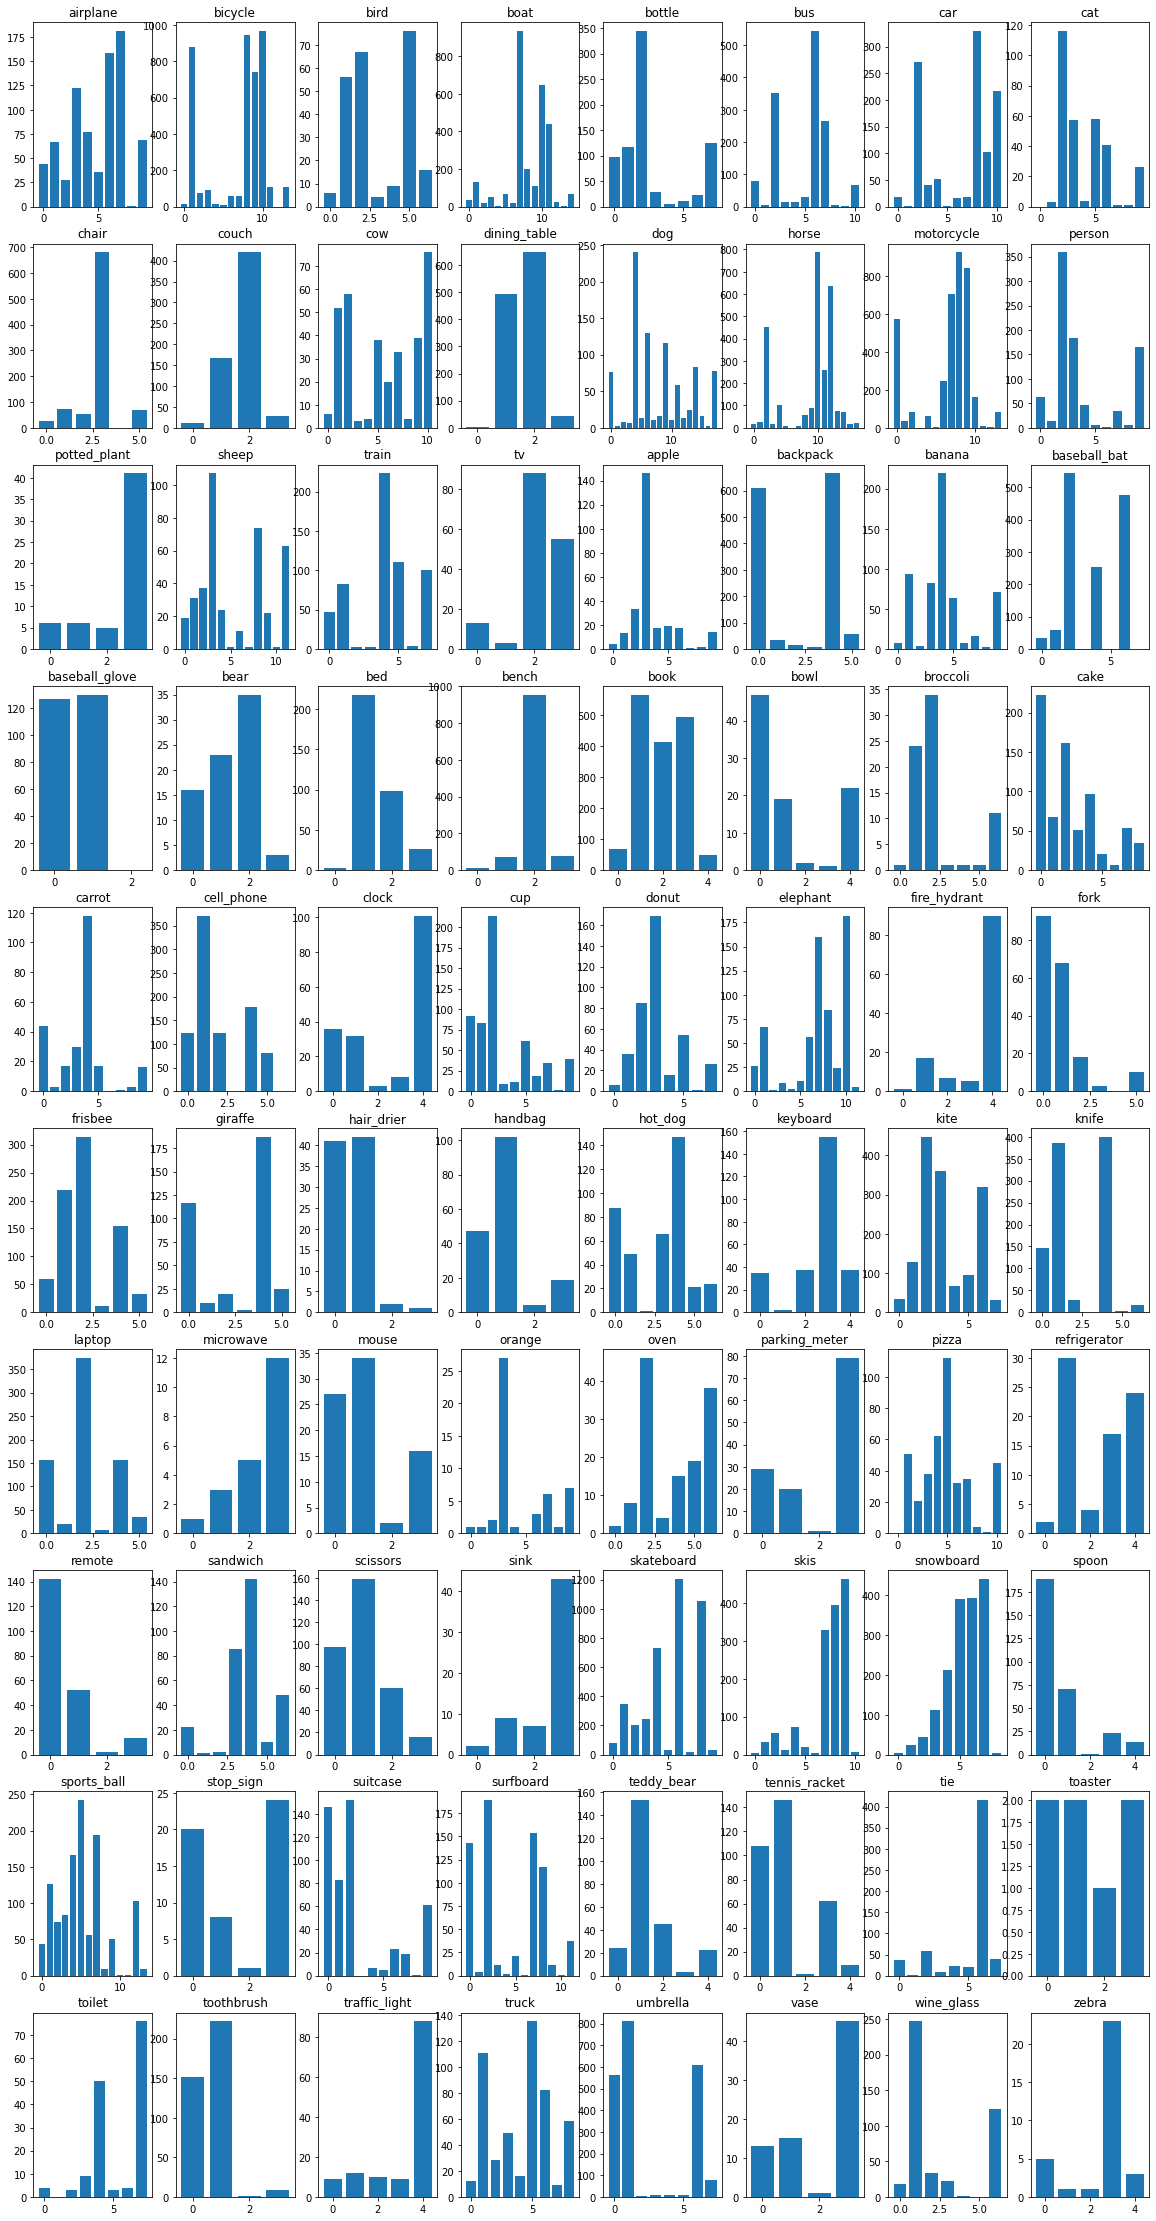

In [76]:
fig, axs = plt.subplots(10, 8, figsize=(20, 40))
i, j = 0, 0
for name, item in hoi_freq_obj_train.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1

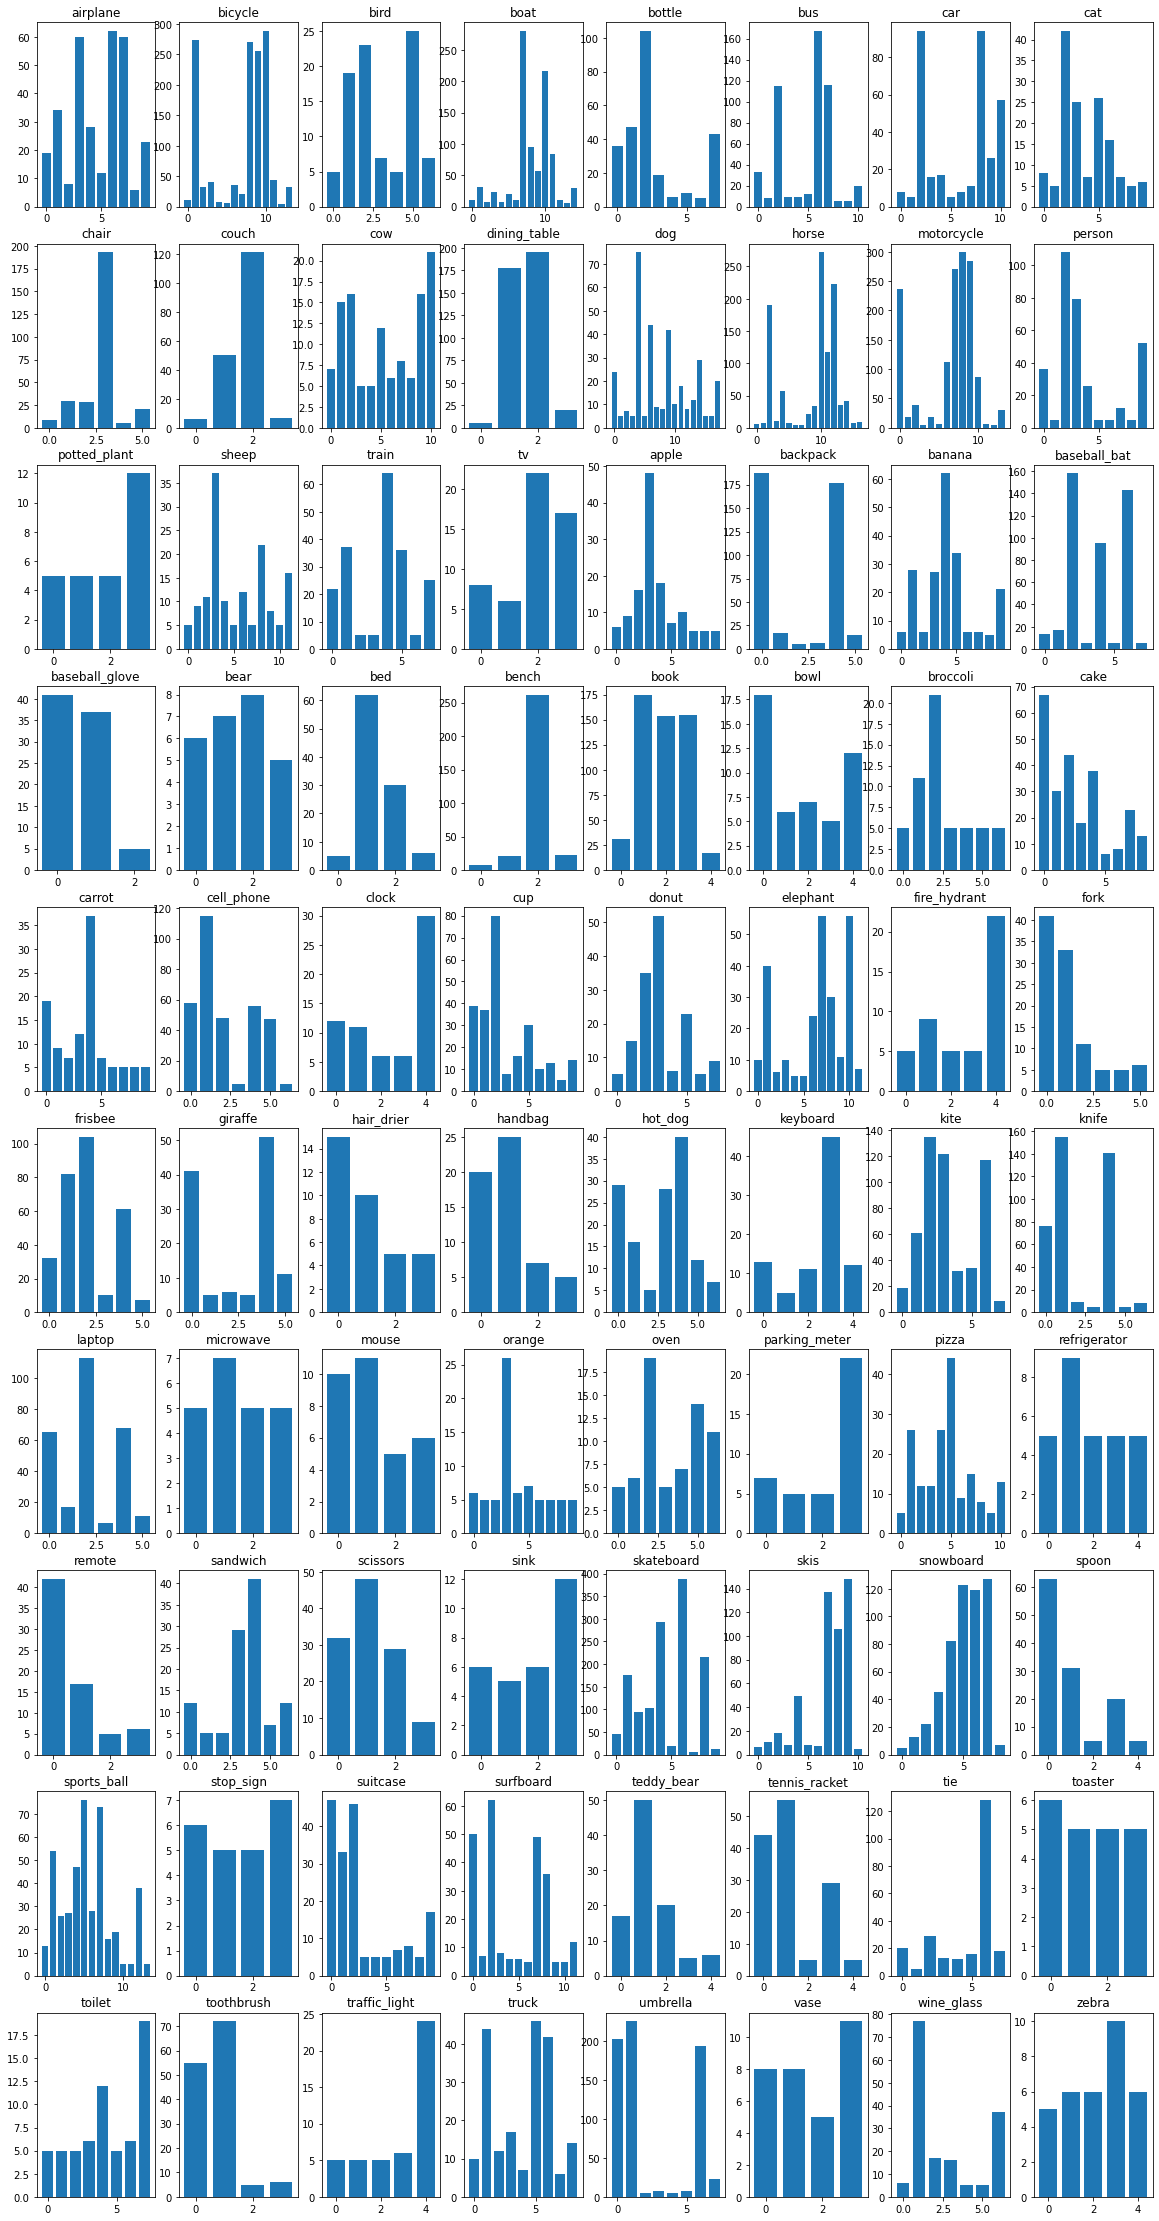

In [78]:
fig, axs = plt.subplots(10, 8, figsize=(20, 40))
i, j = 0, 0
for name, item in hoi_freq_obj_test.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1

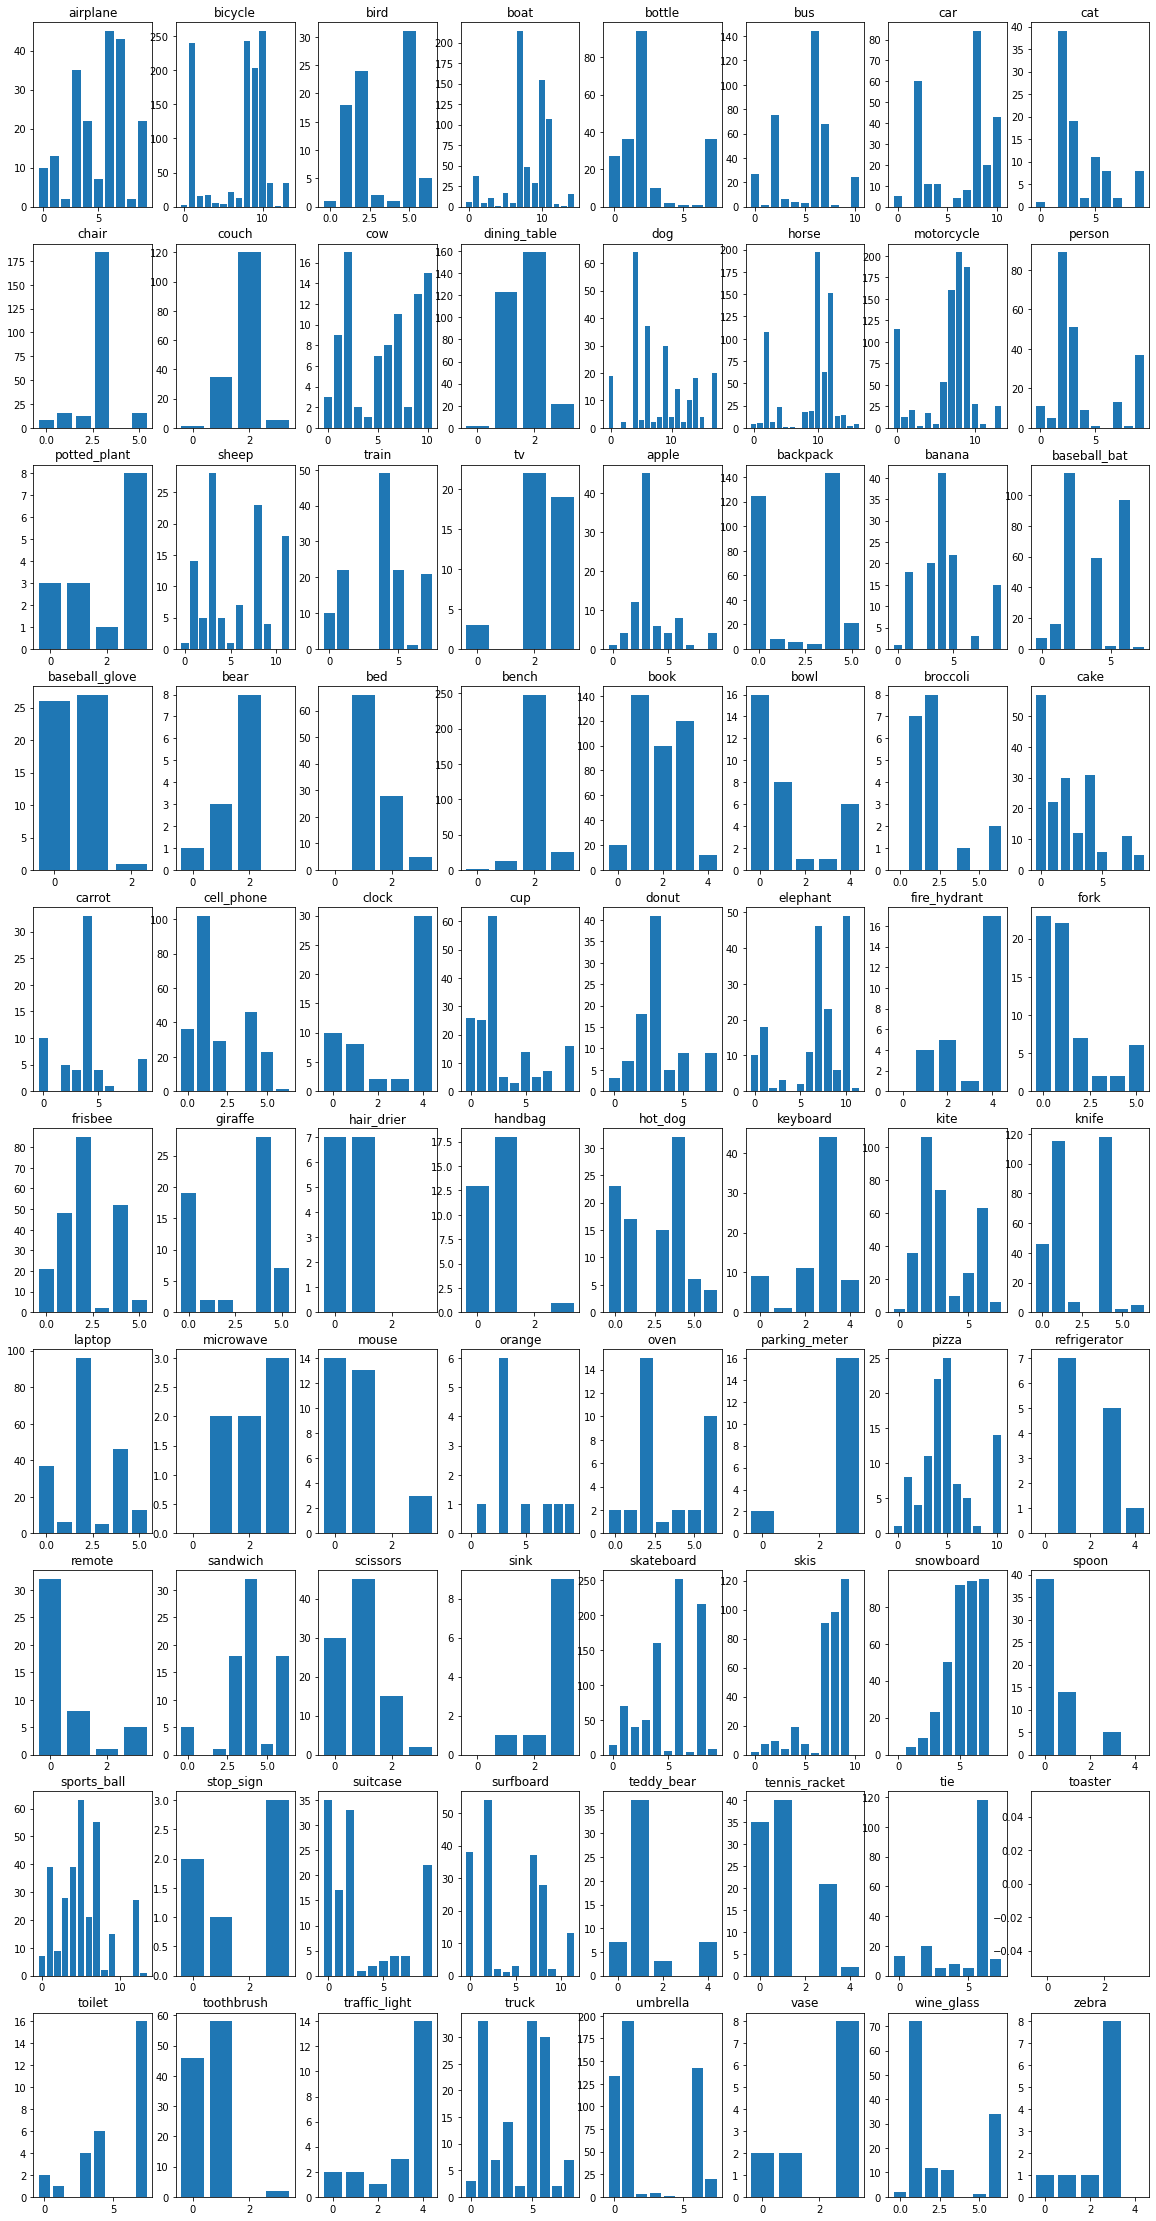

In [77]:
fig, axs = plt.subplots(10, 8, figsize=(20, 40))
i, j = 0, 0
for name, item in hoi_freq_obj_val.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1

## Distributions of HOIs Per Verb

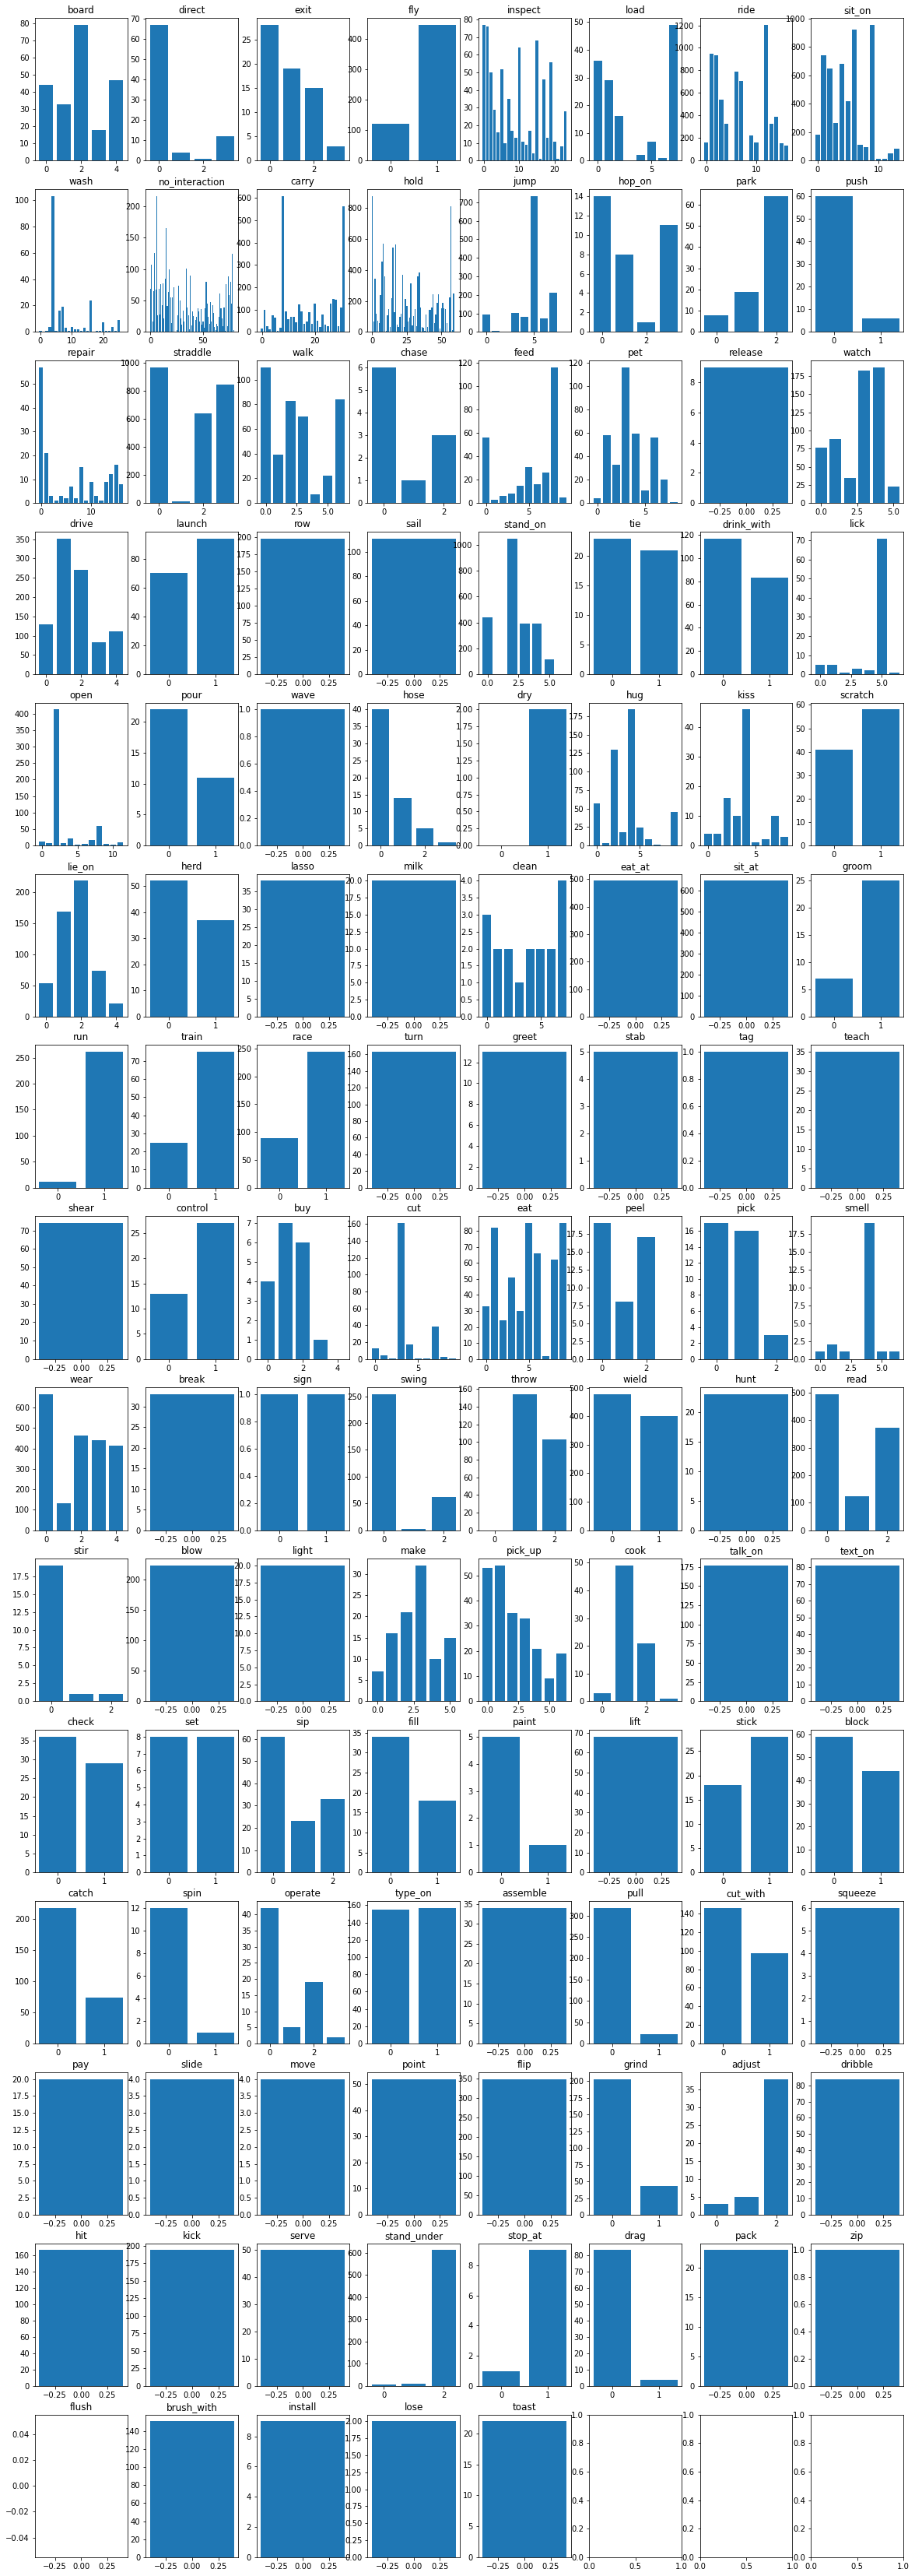

In [82]:
fig, axs = plt.subplots(15, 8, figsize=(20, 60))
i, j = 0, 0
for name, item in hoi_freq_verb_train.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1

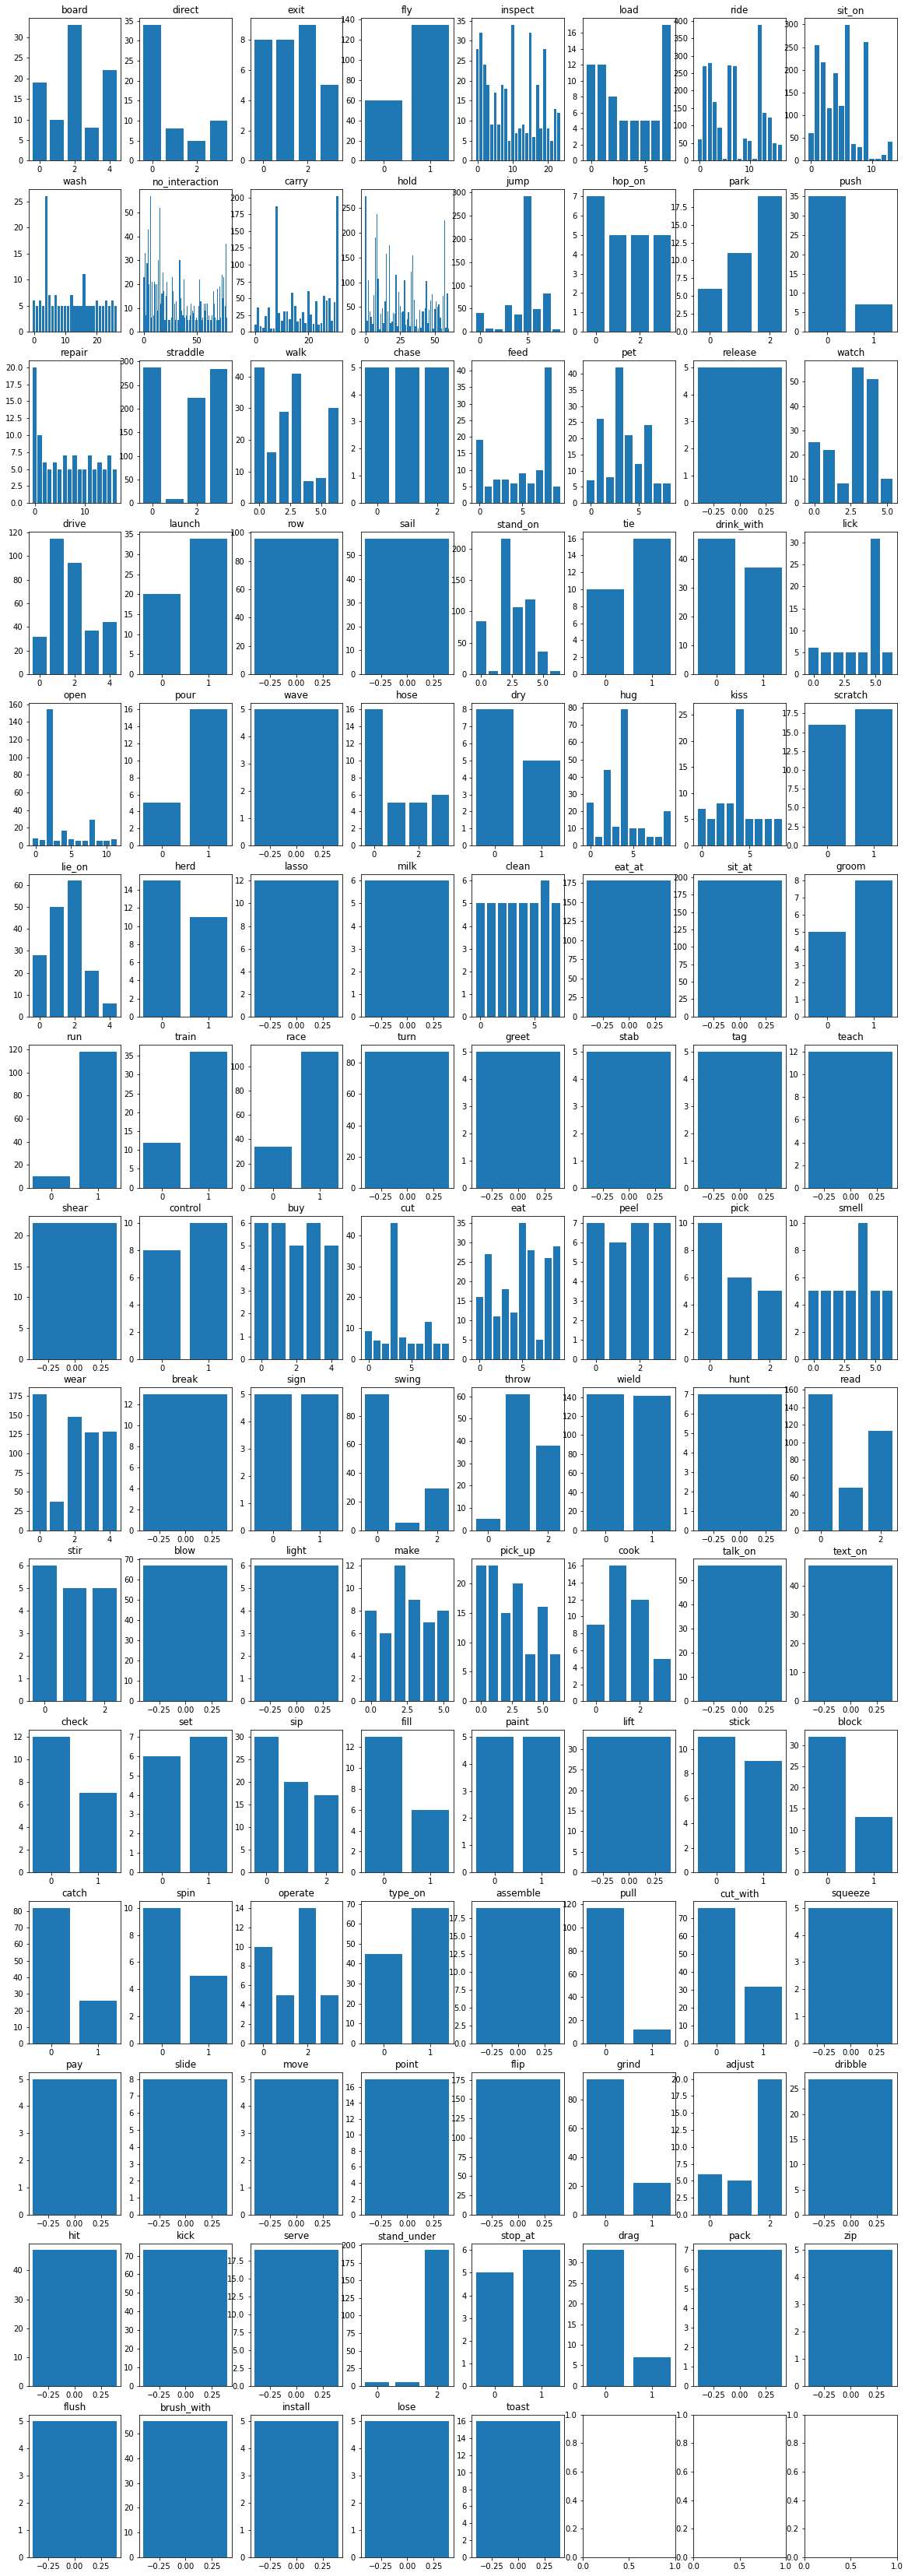

In [83]:
fig, axs = plt.subplots(15, 8, figsize=(20, 60))
i, j = 0, 0
for name, item in hoi_freq_verb_test.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1

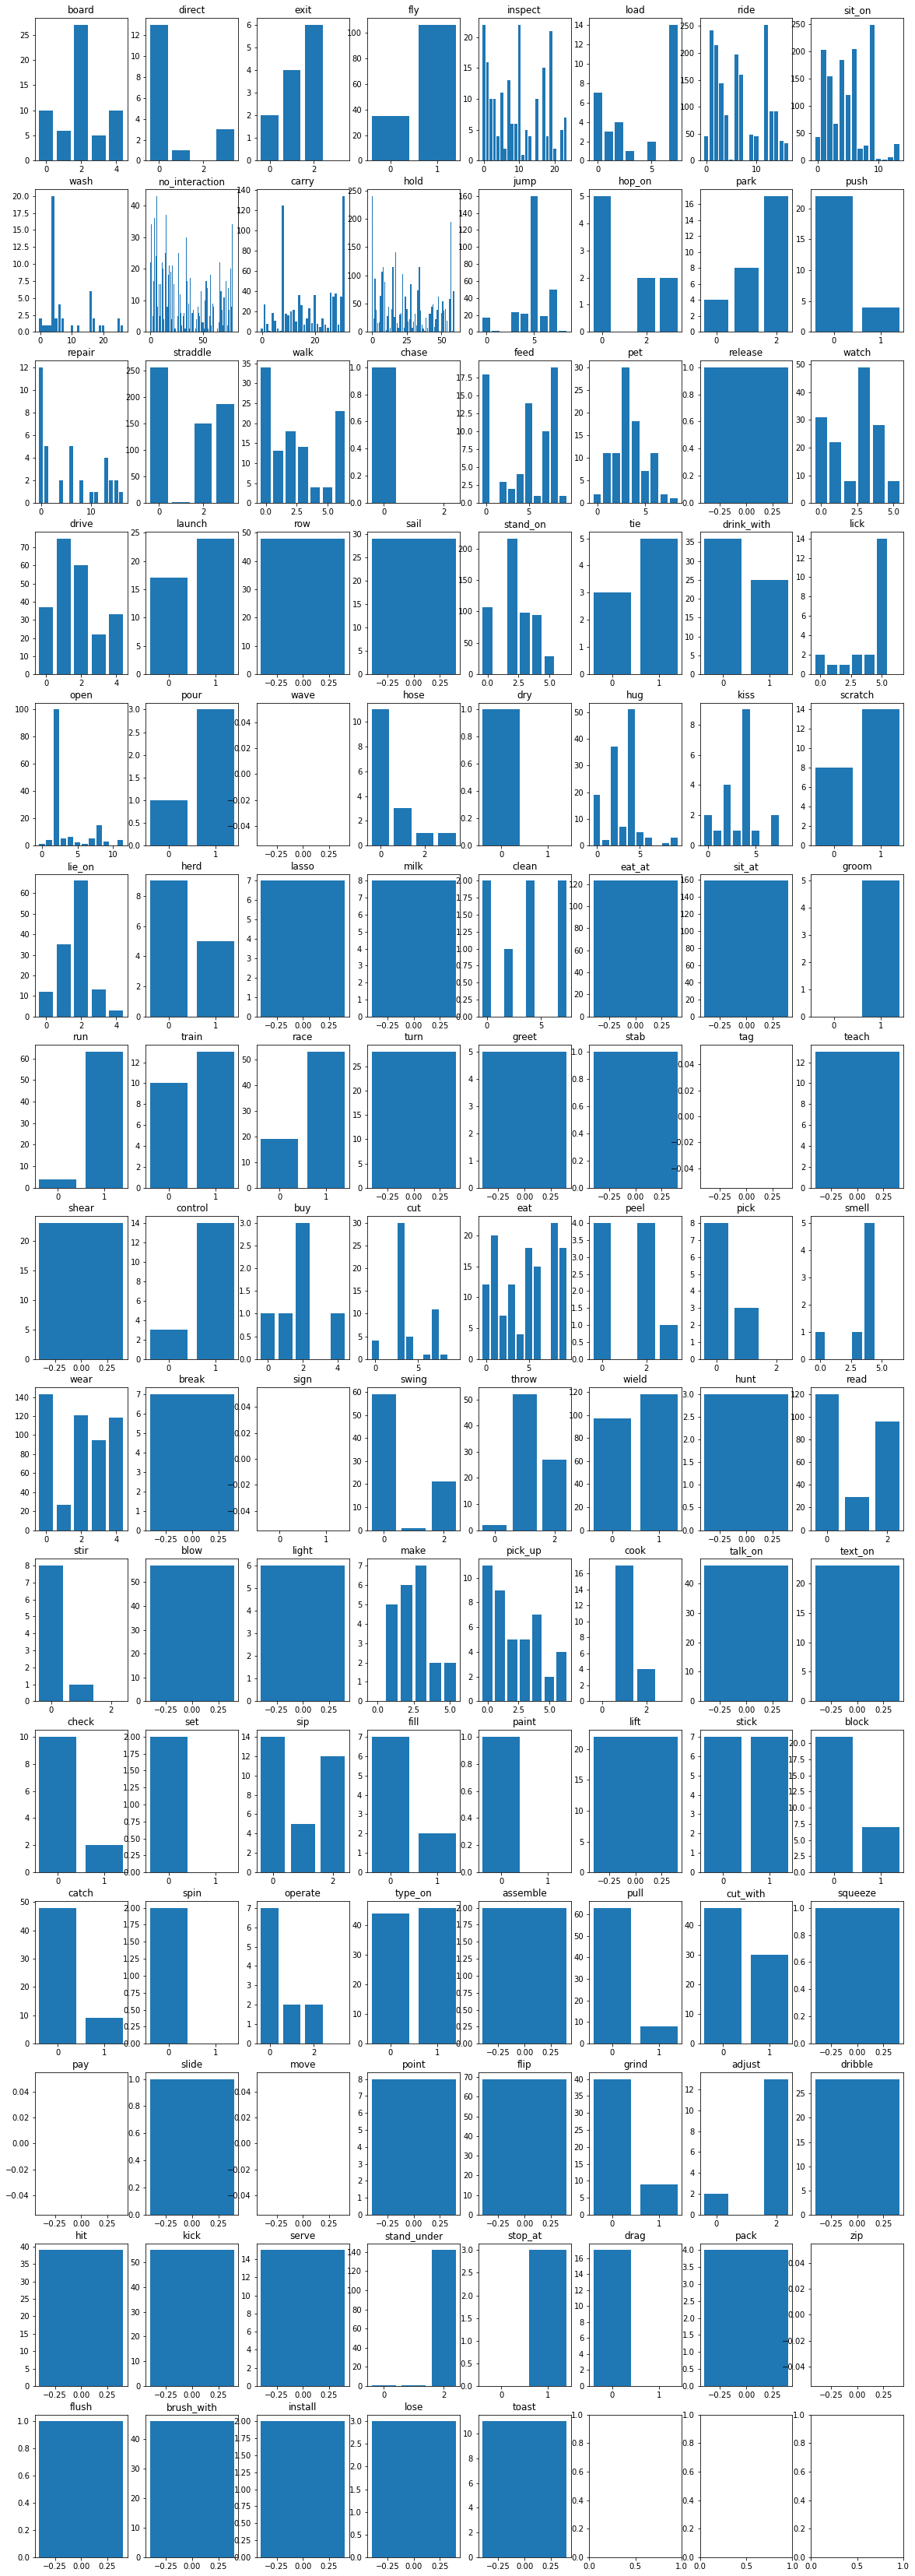

In [84]:
fig, axs = plt.subplots(15, 8, figsize=(20, 60))
i, j = 0, 0
for name, item in hoi_freq_verb_val.items():
    freq = item[0]
    x = np.arange(len(freq))
    axs[i,j].bar(x, height=freq)
    axs[i,j].set_title(name)
    if j==7:
        j = 0
        i += 1
    else:
        j += 1